<div style="text-align: center; padding: 10px; background-color: #F15A05; color:#ffffff; font-size: 40px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">ECOMMERCE CUSTOMER SEGMENTATION</div>




<div style="text-align: center; padding: 10px; color:#000000; font-size: 30px;">Josephine Taiwo Kayode</div>


><img src = "img/image.png" style="display: block; margin: auto;" />/>

<div style="text-align: Left; padding: 10px; background-color: #DE5202; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">1.0 Project Overview</div>

The goal of this project is to understand customer behavior on an Ecommerce platform and group customers into segments based on their interactions with products and brands. By doing this, we aim to uncover valuable insights that can inform marketing strategies and enhance the overall customer experience.

##### Key Steps and Components
1. Data Collection: Gather data on customer interactions, including purchases and product preferences.
2. Data Preprocessing: Clean and prepare the data for analysis, ensuring accuracy and consistency.
3. Exploratory Data Analysis (EDA): Explore the data to identify patterns, trends, and relationships.
4. Clustering Analysis: Use clustering algorithms to group customers into distinct segments.
5. Cluster Interpretation: Analyze the characteristics of each customer segment to understand their preferences and behaviors.

<div style="text-align: Left; padding: 10px; background-color: #DE5202; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">2.0 Data Collection</div>

The data used in this project was provided by my instructor at Zidio development group during my internship program

## 2.1 Importing Packages

In [7]:
#Data Loading and Preprocessing

import pandas as pd #For data manipulation and analysis.
import numpy as np #For numerical operations on arrays and matrices.

#Data Visualization

import seaborn as sns #For creating visualizations and plots.
import matplotlib.pyplot as plt #For creating interactive and static plots using Plotly.

#Preprocessing
from sklearn.preprocessing import LabelEncoder

#Clustering Analysis
from sklearn.cluster import KMeans #For clustering analysis using the KMeans algorithm.
import plotly.graph_objects as go

#Additional Utilities
import warnings
warnings.filterwarnings("ignore")

## 2.2 Importing Dataset

#### 2.2.1 Reading the dataset into a pandas data frame and loading it into the python environment

To begin our analysis, we first need to import the dataset containing information about customer interactions on our E-commerce platform and load the dataset into the Python environment: using the pd.read_csv() function to read the dataset 


In [8]:
df = pd.read_excel('dataset/datasets.xlsx')

#### 2.2.2 Displaying the first few rows of the dataset

It's always a good practice to check if the data has been loaded correctly. We then used the df.head() to display the first few rows of the dataset.

In [9]:
df.head(5)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


#### 2.2.3 Getting an Overview of the dataset structure and its content

After loading the dataset, it's helpful to get an overview of its structure and contents. We then used df.info() to see the column names, data types, and any missing values in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

#### 2.2.4 Counting missing values in the dataset

We used df.isnull().sum() to count missing values in our dataset. 
This helps us: Check data quality, decide how to handle missing values, and ensure our analysis is accurate. 
'Gender' has many missing values, we'll find ways to fill them for better insights.


In [11]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

<div style="text-align: Left; padding: 10px; background-color: #DE5202; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">3.0 Data Preprocessing</div>

Here, we transformed the variable Gender from categgorical variable into numerical variable for smooth ride analysis

In [12]:
encoder = LabelEncoder()

In [13]:
df["Gender"] = encoder.fit_transform(df["Gender"])

<div style="text-align: Left; padding: 10px; background-color: #DE5202; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">4.0 Exploratory Data Analysis</div>

In the Exploratory Data Analysis (EDA) section, we dived into our e-commerce dataset to uncover valuable insights before segmentation. Here's what we did:
1. Visualizing Data: We used graphs like bar charts and pie charts to see patterns and trends in customer behavior, such as popular products or buying preferences.
2. Understanding Gender Distribution: We looked at how many customers are male, female, or unknown to understand our customer base better.
3. Identifying Trends: By analyzing orders and interactions with brands, we identify trends that can help us group customers effectively.

   
Our goal in this EDA is to get a clear picture of our data, which guided our segmentation strategy for targeted marketing and improved customer experience.



### 3.0.1 Univariate Analysis

Here the focus was to examine and understand individual variables in the dataset. We examined the "Gender" and "Orders" columns to get a better understanding of the features and characteristics of this column so as to aid further exploratory analysis. The goal is to derive valuable insights

### Genders

<Axes: xlabel='Gender', ylabel='count'>

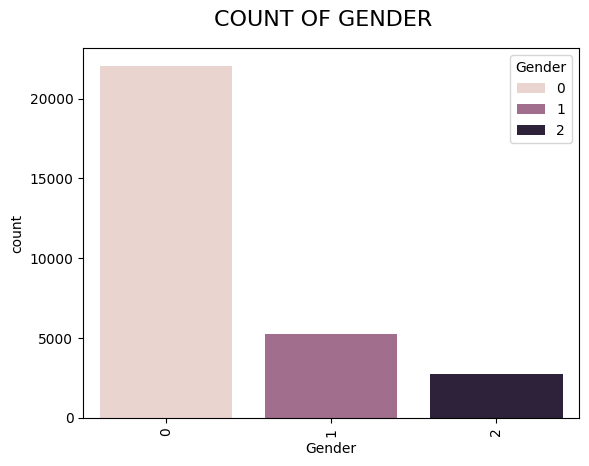

In [14]:
plt.xticks(rotation = 90)

plt.suptitle("COUNT OF GENDER", size = 16, y = 0.96);

sns.countplot(x = "Gender", data = df, hue = "Gender")

In this analysis, we discovered the number of female customers is higher than the number of male customers. Hence, the female customers are more than male customers 

### Orders

Upon analyzing the 'Orders' column in our E-commerce dataset, several key insights emerged:

1. Central Tendency:
The average number of orders per customer is 30,000.
The median order frequency, at 4.000000 indicates the middle point of order distribution.

2. Distribution Visualization:
The histogram showcases   skewed distribution of order frequencies The customers in category 0 have the highest count of order frequency..



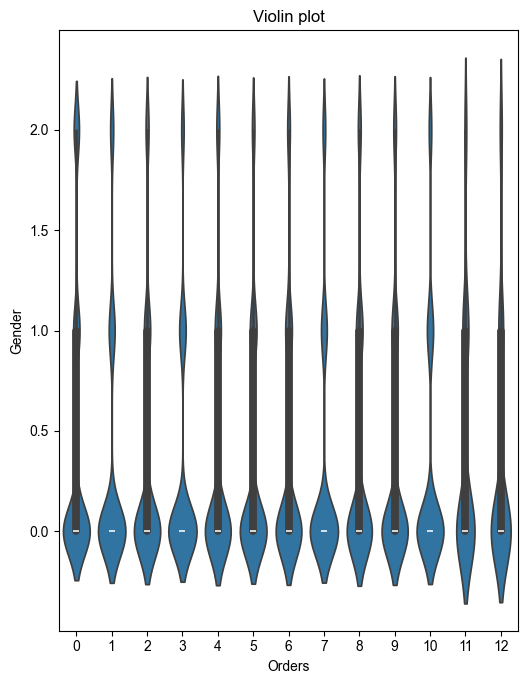

In [15]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Orders']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style = "whitegrid")
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x=cols, y='Gender', data =df)
    #sns.distplot(df[x] , bins = 20)
    plt.ylabel('Gender' if n == 1 else '') 
    plt.title('Violin plot')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### The distribution of some other variables in the dataset

In [16]:
print(df.columns)

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')


In [17]:
df.shape

(30000, 38)

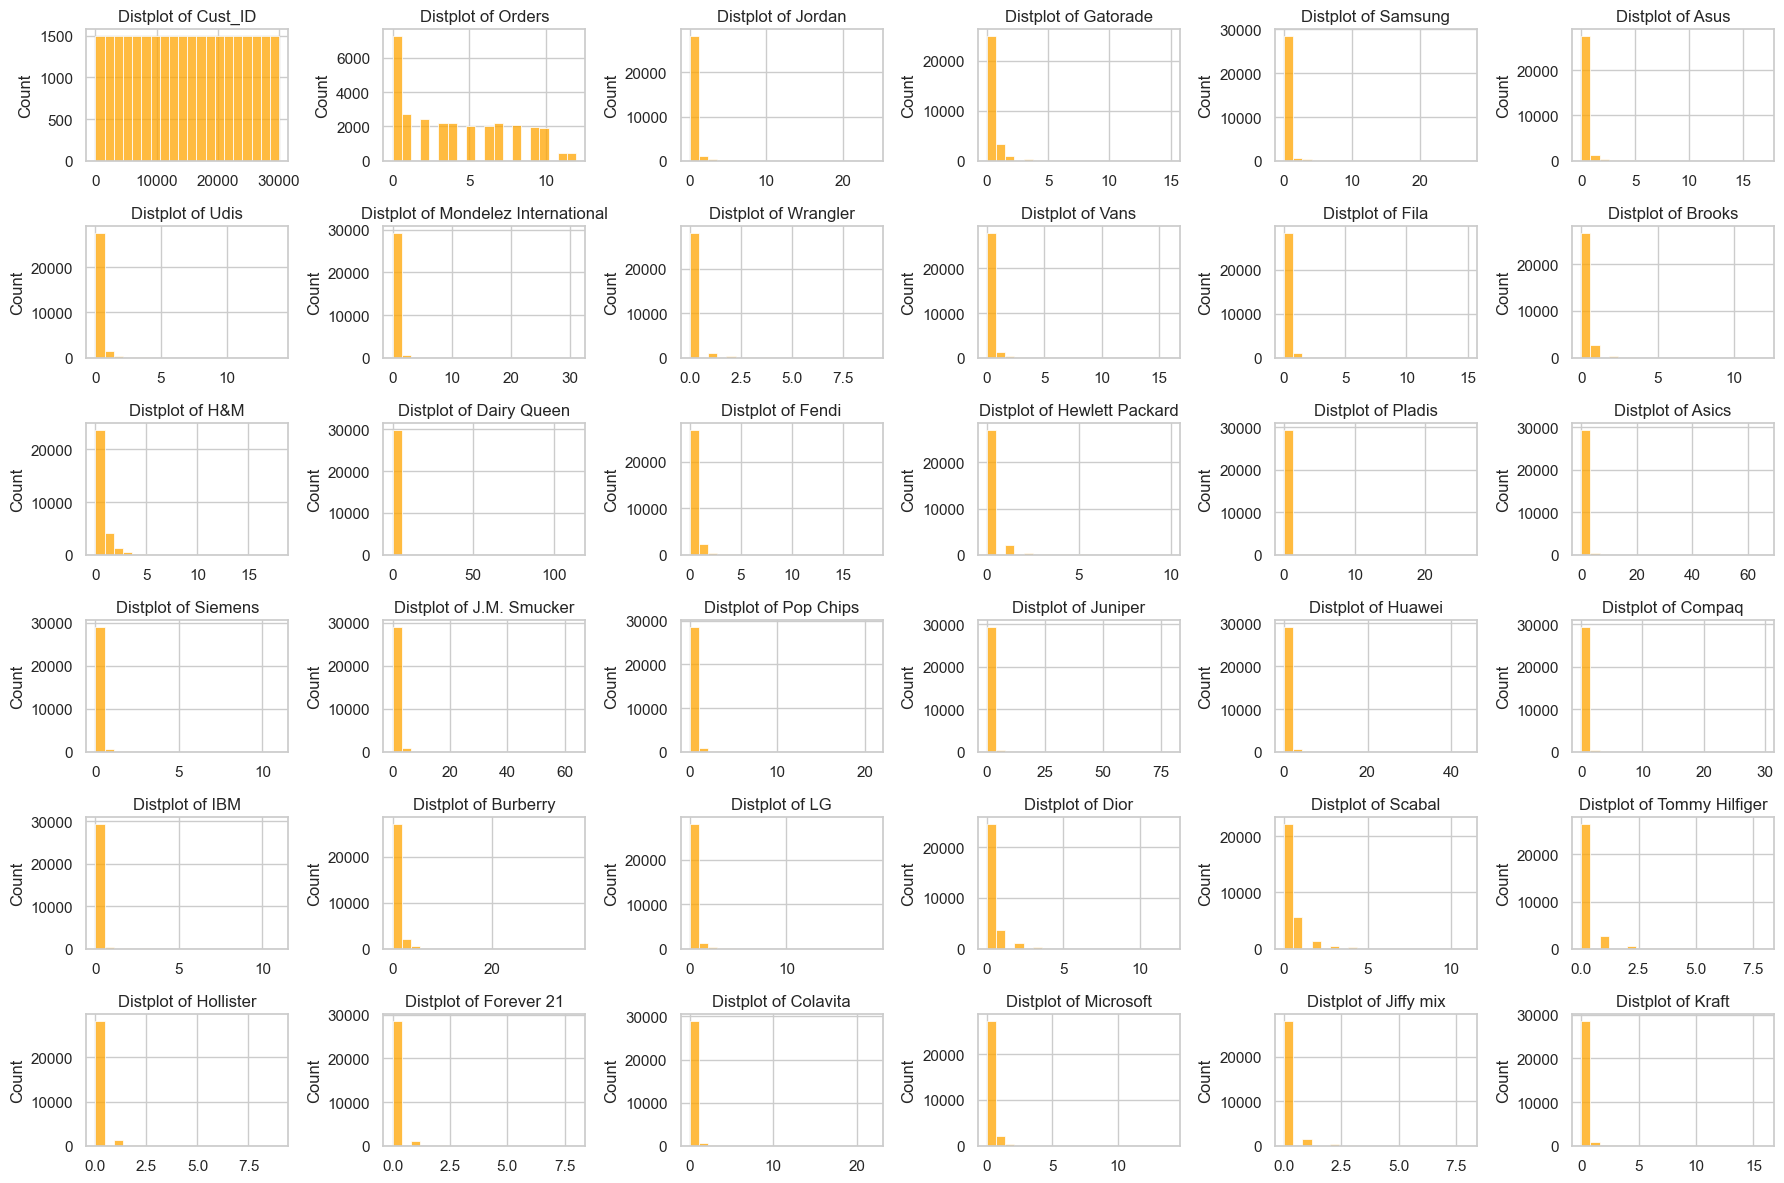

In [18]:
plt.figure(figsize=(18,12))
n=0
for x in ['Cust_ID','Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft']:
    n += 1
    plt.subplot(6, 6, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[x], bins=20, color='orange')
    #sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
    plt.xlabel('')  # Remove xlabel if not needed
    plt.ylabel('Count')  # Add ylabel if needed

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
    

### 3.0.2 Bivariate Analysis

In this analysis, we uncovered connections between variables in our dataset, which guided our segmentation and marketing strategies.

#### Gender and Others

Here, we discovered that the female customers have the highest number of orders

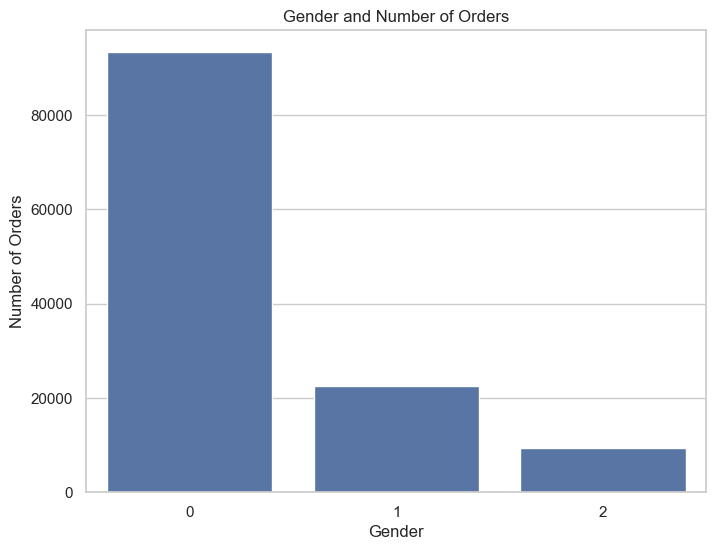

In [19]:
# Gender and number of orders
gender_orders = df.groupby('Gender')['Orders'].sum()

# Bar plot for Gender and Number of Orders
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_orders.index, y=gender_orders.values)
plt.title('Gender and Number of Orders')
plt.xlabel('Gender')
plt.ylabel('Number of Orders')
plt.show()

<div style="text-align: Left; padding: 10px; background-color: #DE5202; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">5.0 Clustering Analysis</div>

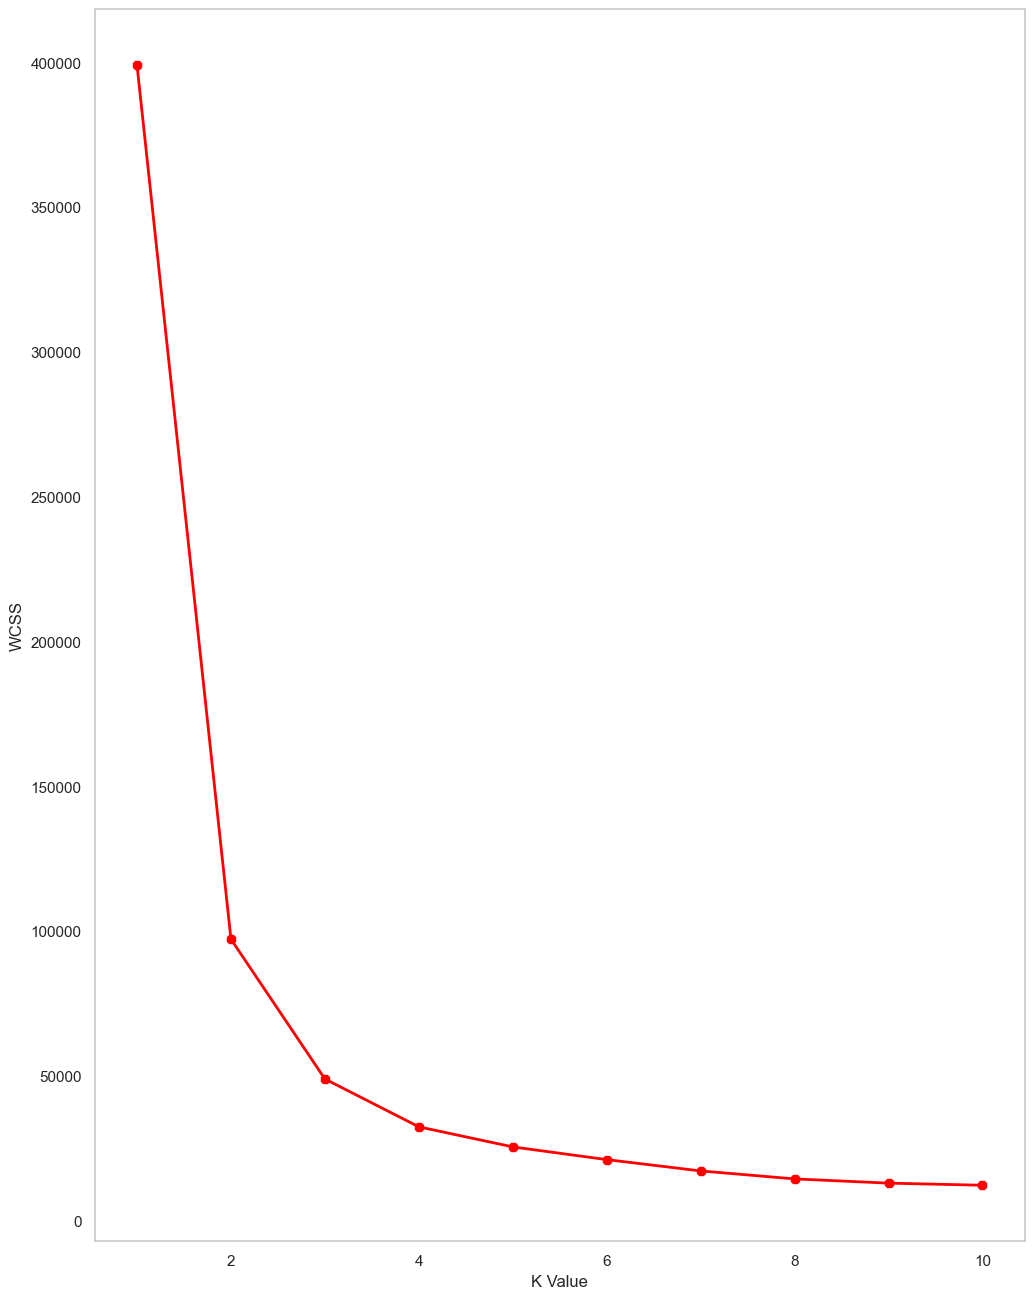

In [20]:
X1 = df.loc[:, ["Gender", "Orders"]].values
wcss=[ ]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,16))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[2 0 2 ... 0 0 3]


In [22]:
print(kmeans.cluster_centers_)

[[0.40969031 0.27132867]
 [0.33391128 9.31021529]
 [0.32161125 6.03148977]
 [0.32966388 2.96624101]]


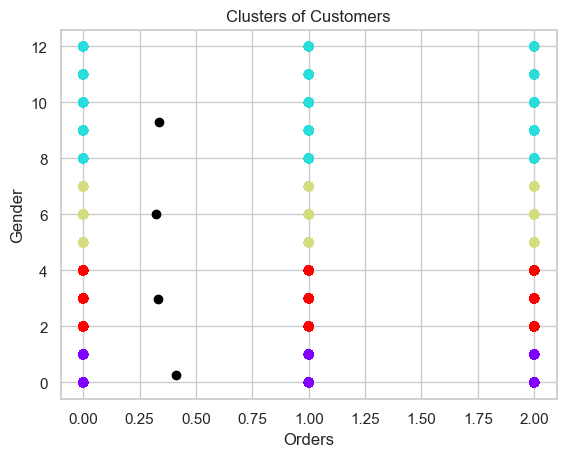

In [23]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Clusters of Customers')
plt.xlabel('Orders')
plt.ylabel('Gender')
plt.show()